In [1]:
import pandas as pd
import torch
from transformers import AutoModel, AutoTokenizer
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_pickle('../data/pickles/review_data.pkl')

In [3]:
train_labels = train_df['review_score']

In [4]:
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
token_lens = []
for txt in list(train_df.Review):
    tokens = tokenizer.encode(txt, max_length=256, truncation=True)
    token_lens.append(len(tokens))

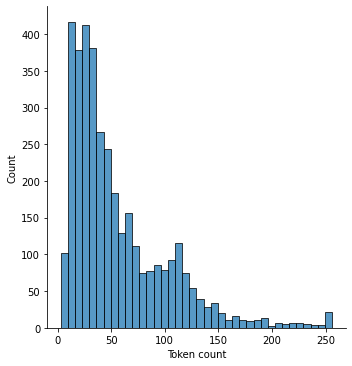

In [6]:
sns.displot(token_lens)
plt.xlabel('Token count')
plt.show()

In [7]:
def phobert_tokenizer(text):
    input_ids = torch.tensor([tokenizer.encode(text, max_length=200, truncation=True)])
    with torch.no_grad():
        features = phobert(input_ids)
    return features['last_hidden_state']

In [8]:
train_df.Review = train_df.Review.apply(phobert_tokenizer)

In [10]:
train_df.to_pickle("../../tokenized_data.pkl")